In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('./Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Splitting Features and Target

In [4]:
X = df.drop(['Species'], axis=1)
y = df['Species']

In [5]:
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [6]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

### Standard Scaler

In [7]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)

In [8]:
X_standardized_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977


In [9]:
X_standardized_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,0.000000,-4.736952e-16,-6.631732e-16,3.315866e-16,-2.842171e-16
std,1.003350,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.720542,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-0.860271,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,0.000000,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,0.860271,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,1.720542,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


### Principle Component Analysis

In [10]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_standardized)
principal_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

In [11]:
final_df = pd.concat([principal_df, y], axis=1)

In [12]:
final_df.head()

,PC1,PC2,Species
0,-2.816339,0.506051,Iris-setosa
1,-2.645527,-0.651799,Iris-setosa
2,-2.879481,-0.321036,Iris-setosa
3,-2.810934,-0.577363,Iris-setosa
4,-2.879884,0.670468,Iris-setosa


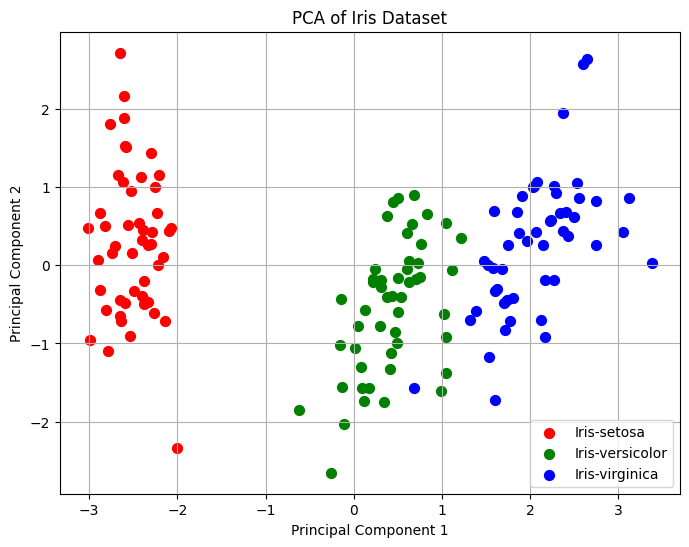

In [13]:
plt.figure(figsize=(8, 6))

colors = ['red', 'green', 'blue']
species_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for species, color in zip(species_names, colors):
    indices_to_keep = final_df['Species'] == species
    plt.scatter(final_df.loc[indices_to_keep, 'PC1'], 
                final_df.loc[indices_to_keep, 'PC2'], 
                c=color, s=50, label=species)

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.grid()